In [1]:
import pandas as pd

In [4]:
# load the data
SPEAKER_WITH_AFFILIATION_PATH = "../data/binary/speaker_with_affiliation.pickle"
speaker_with_affiliation = pd.read_pickle(SPEAKER_WITH_AFFILIATION_PATH)
speaker_with_affiliation.head()

,quoteID,quotation,label,party
0,2020-01-26-000499,a few of the candidates who will do better in ...,David Loebsack,Q29552
1,2020-01-26-040663,"The generational thing is important, quite hon...",David Loebsack,Q29552
2,2020-02-01-035378,Once I could stand in front of audiences and s...,David Loebsack,Q29552
3,2020-01-22-024629,He knows we have a problem of gun violence. He...,David Loebsack,Q29552
4,2020-01-12-041928,They can't be solved with the same political w...,David Loebsack,Q29552


In [9]:
# most common parties:
speaker_with_affiliation["party"].value_counts()[:10]


Q29468     84042
Q29552     49919
Q9626       9249
Q9630       9077
Q216082     4316
Q241149     3234
Q622441     3055
Q826977     2289
Q42183      2225
Q138345     2003
Name: party, dtype: int64

In [ ]:
# US: Q29468 is the republican party, Q29468 is the Democratic party
# UK: Q9626 is the Conservative party, Q9630 is the Labour party, Q622441 is the Liberal Party
# AU: Q216082 is the Australian Labor party, Q241149 is the Liberal party of Australia, 

In [3]:
# Q29468 is the republican party, Q29468 is the Democratic party
# split into democrats and republicans
democrats = speaker_with_affiliation[speaker_with_affiliation["party"] == "Q29552"]
republicans = speaker_with_affiliation[speaker_with_affiliation["party"] == "Q29468"]

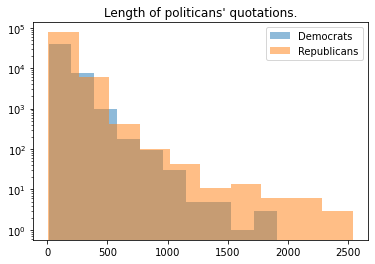

In [17]:
import matplotlib.pyplot as plt

democrats_lengths = democrats["quotation"].apply(lambda x: len(x))
republicans_lengths = republicans["quotation"].apply(lambda x: len(x))

plt.hist(democrats_lengths, log=True,alpha=0.5, label="Democrats")
plt.hist(republicans_lengths, log=True, alpha=0.5, label = "Republicans")
plt.title("Length of politicans' quotations.")
plt.legend()
plt.show()